In [2]:
library(tidyverse)
library(tmlenet)
library(arrow)
library(igraph)
library(Matrix)
library(simcausal)

── Attaching core tidyverse packages ───────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ─────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
tmlenet

The tmlenet package is still in beta testing. Interpret results with caution.


Attaching package: ‘arrow’


The following object is masked from ‘package:lubridate’:

    duration


The following object is masked from ‘package:utils’:

    timestamp



Attaching package: ‘igraph’


The following objects are masked from ‘package:lubridate’:

    %--%, union


The following objects are masked from ‘package:dplyr’:

    as_d

In [3]:
datO.feature <- read_feather(
    paste0('data/feature_', formatC(0, flag=0, width=3),'.feather')
)
datO.network <- read_feather('data/network.feather')

In [4]:
datO.feature$T.new1 = 1
datO.feature$T.new2 = 0

In [5]:
n_node = dim(datO.feature)[1]

In [6]:
datO.feature

X1,X2,X3,W1,W2,W3,p,T,m,Y,T.new1,T.new2
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>
0,1,1,-0.25,0.25,-0.25,0.5000000,1,0.62245933,0,1,0
0,0,1,0.25,-0.25,-0.25,0.2227001,1,0.90465054,1,1,0
1,0,0,-0.25,0.25,-0.25,0.5445246,0,0.32082130,1,1,0
0,1,1,-0.25,0.25,-0.25,0.6513549,1,0.40733340,1,1,0
1,1,1,0.25,0.25,0.25,0.5000000,1,0.62245933,1,1,0
0,1,0,-0.25,-0.25,0.25,0.7772999,1,0.22270014,1,1,0
0,1,0,-0.25,-0.25,0.25,0.5000000,0,0.37754067,1,1,0
1,1,1,0.25,0.25,0.25,0.6026853,1,0.47917871,0,1,0
0,0,1,0.25,-0.25,-0.25,0.7772999,0,0.09534946,0,1,0


In [7]:
G = graph.data.frame(datO.network[c(2,1)], vertices=1:n_node)

In [8]:
G_NetInd = sparseAdjMat.to.NetInd(get.adjacency(G))

In [9]:
Kmax = G_NetInd$Kmax

In [10]:
sW <- def_sW(
    X1, netX1 = mean(X1[[1:Kmax]]), X2, netX2 = mean(X2[[1:Kmax]]), 
    replaceNAw0=TRUE
)

Some summary measures were not named, automatic column name(s) will be generated during evaluation



In [11]:
sA <- def_sA(T, netT = mean(T[[1:Kmax]] - 0.5), replaceNAw0=TRUE)

Some summary measures were not named, automatic column name(s) will be generated during evaluation



In [12]:
new.sA1 = def_new_sA(T = T.new1)

In [13]:
new.sA2 = def_new_sA(T = T.new2)

In [14]:
n_sim = 40

In [15]:
Yh1s_sim = rep(0, n_sim)
Yh2s_sim = rep(0, n_sim)
error_sim = rep(FALSE, n_sim)

In [16]:
options(warn=-1)

In [17]:
for(i_sim in 1:n_sim){
    iter_time = Sys.time()
    
    try({
        dat_i <- read_feather(
            paste0('data/feature_', formatC(i_sim-1, flag=0, width=3),'.feather')
        )
        
        dat_i$T.new1 = 1
        dat_i$T.new2 = 0
        
        res_tmlenet = tmlenet(
            data = dat_i, NETIDmat = G_NetInd$NetInd_k, Kmax = Kmax,
            sW = sW, sA = sA,
            Ynode = "Y", intervene1.sA = new.sA1, intervene2.sA = new.sA2)
        Yh1s_sim[i_sim] = res_tmlenet$EY_gstar1$estimates[1]
        Yh2s_sim[i_sim] = res_tmlenet$EY_gstar2$estimates[1]
        error_sim[i_sim] = TRUE
    })
    
    message(
        paste0("iteration ", i_sim, ", elapsed time: ", 
               difftime(Sys.time(), iter_time, units="secs")[[1]], " secs.")
    )
}

[1] "updated expression list for new.sA: "
$T
[1] "T.new1"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"
[1] "updated expression list for new.sA: "
$T
[1] "T.new2"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"


iteration 1, elapsed time: 3.00333094596863 secs.



[1] "updated expression list for new.sA: "
$T
[1] "T.new1"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"
[1] "updated expression list for new.sA: "
$T
[1] "T.new2"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"


iteration 2, elapsed time: 2.525230884552 secs.



[1] "updated expression list for new.sA: "
$T
[1] "T.new1"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"
[1] "updated expression list for new.sA: "
$T
[1] "T.new2"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"


iteration 3, elapsed time: 2.27384400367737 secs.



[1] "updated expression list for new.sA: "
$T
[1] "T.new1"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"
[1] "updated expression list for new.sA: "
$T
[1] "T.new2"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"


iteration 4, elapsed time: 2.35772085189819 secs.



[1] "updated expression list for new.sA: "
$T
[1] "T.new1"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"
[1] "updated expression list for new.sA: "
$T
[1] "T.new2"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"


iteration 5, elapsed time: 2.4641489982605 secs.



[1] "updated expression list for new.sA: "
$T
[1] "T.new1"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"
[1] "updated expression list for new.sA: "
$T
[1] "T.new2"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"


iteration 6, elapsed time: 2.33728814125061 secs.



[1] "updated expression list for new.sA: "
$T
[1] "T.new1"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"
[1] "updated expression list for new.sA: "
$T
[1] "T.new2"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"


iteration 7, elapsed time: 2.35579919815063 secs.



[1] "updated expression list for new.sA: "
$T
[1] "T.new1"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"
[1] "updated expression list for new.sA: "
$T
[1] "T.new2"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"


iteration 8, elapsed time: 2.24849605560303 secs.



[1] "updated expression list for new.sA: "
$T
[1] "T.new1"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"
[1] "updated expression list for new.sA: "
$T
[1] "T.new2"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"


iteration 9, elapsed time: 2.37643480300903 secs.



[1] "updated expression list for new.sA: "
$T
[1] "T.new1"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"
[1] "updated expression list for new.sA: "
$T
[1] "T.new2"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"


iteration 10, elapsed time: 2.37492513656616 secs.



[1] "updated expression list for new.sA: "
$T
[1] "T.new1"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"
[1] "updated expression list for new.sA: "
$T
[1] "T.new2"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"


iteration 11, elapsed time: 2.25898790359497 secs.



[1] "updated expression list for new.sA: "
$T
[1] "T.new1"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"
[1] "updated expression list for new.sA: "
$T
[1] "T.new2"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"


iteration 12, elapsed time: 2.35063195228577 secs.



[1] "updated expression list for new.sA: "
$T
[1] "T.new1"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"
[1] "updated expression list for new.sA: "
$T
[1] "T.new2"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"


iteration 13, elapsed time: 2.26321721076965 secs.



[1] "updated expression list for new.sA: "
$T
[1] "T.new1"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"
[1] "updated expression list for new.sA: "
$T
[1] "T.new2"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"


iteration 14, elapsed time: 2.37025499343872 secs.



[1] "updated expression list for new.sA: "
$T
[1] "T.new1"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"
[1] "updated expression list for new.sA: "
$T
[1] "T.new2"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"


iteration 15, elapsed time: 2.25995898246765 secs.



[1] "updated expression list for new.sA: "
$T
[1] "T.new1"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"
[1] "updated expression list for new.sA: "
$T
[1] "T.new2"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"


iteration 16, elapsed time: 2.35885691642761 secs.



[1] "updated expression list for new.sA: "
$T
[1] "T.new1"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"
[1] "updated expression list for new.sA: "
$T
[1] "T.new2"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"


iteration 17, elapsed time: 2.3668520450592 secs.



[1] "updated expression list for new.sA: "
$T
[1] "T.new1"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"
[1] "updated expression list for new.sA: "
$T
[1] "T.new2"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"


iteration 18, elapsed time: 2.32168793678284 secs.



[1] "updated expression list for new.sA: "
$T
[1] "T.new1"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"
[1] "updated expression list for new.sA: "
$T
[1] "T.new2"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"


iteration 19, elapsed time: 2.39529800415039 secs.



[1] "updated expression list for new.sA: "
$T
[1] "T.new1"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"
[1] "updated expression list for new.sA: "
$T
[1] "T.new2"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"


iteration 20, elapsed time: 2.25668597221375 secs.



[1] "updated expression list for new.sA: "
$T
[1] "T.new1"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"
[1] "updated expression list for new.sA: "
$T
[1] "T.new2"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"


iteration 21, elapsed time: 2.35129714012146 secs.



[1] "updated expression list for new.sA: "
$T
[1] "T.new1"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"
[1] "updated expression list for new.sA: "
$T
[1] "T.new2"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"


iteration 22, elapsed time: 2.2556619644165 secs.



[1] "updated expression list for new.sA: "
$T
[1] "T.new1"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"
[1] "updated expression list for new.sA: "
$T
[1] "T.new2"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"


iteration 23, elapsed time: 2.36968088150024 secs.



[1] "updated expression list for new.sA: "
$T
[1] "T.new1"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"
[1] "updated expression list for new.sA: "
$T
[1] "T.new2"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"


iteration 24, elapsed time: 2.36379504203796 secs.



[1] "updated expression list for new.sA: "
$T
[1] "T.new1"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"
[1] "updated expression list for new.sA: "
$T
[1] "T.new2"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"


iteration 25, elapsed time: 2.24883484840393 secs.



[1] "updated expression list for new.sA: "
$T
[1] "T.new1"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"
[1] "updated expression list for new.sA: "
$T
[1] "T.new2"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"


iteration 26, elapsed time: 2.36020493507385 secs.



[1] "updated expression list for new.sA: "
$T
[1] "T.new1"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"
[1] "updated expression list for new.sA: "
$T
[1] "T.new2"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"


iteration 27, elapsed time: 2.25922608375549 secs.



[1] "updated expression list for new.sA: "
$T
[1] "T.new1"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"
[1] "updated expression list for new.sA: "
$T
[1] "T.new2"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"


iteration 28, elapsed time: 2.34768795967102 secs.



[1] "updated expression list for new.sA: "
$T
[1] "T.new1"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"
[1] "updated expression list for new.sA: "
$T
[1] "T.new2"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"


iteration 29, elapsed time: 2.2954831123352 secs.



[1] "updated expression list for new.sA: "
$T
[1] "T.new1"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"
[1] "updated expression list for new.sA: "
$T
[1] "T.new2"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"


iteration 30, elapsed time: 2.36098909378052 secs.



[1] "updated expression list for new.sA: "
$T
[1] "T.new1"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"
[1] "updated expression list for new.sA: "
$T
[1] "T.new2"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"


iteration 31, elapsed time: 2.35008597373962 secs.



[1] "updated expression list for new.sA: "
$T
[1] "T.new1"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"
[1] "updated expression list for new.sA: "
$T
[1] "T.new2"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"


iteration 32, elapsed time: 2.25341415405273 secs.



[1] "updated expression list for new.sA: "
$T
[1] "T.new1"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"
[1] "updated expression list for new.sA: "
$T
[1] "T.new2"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"


iteration 33, elapsed time: 2.34867906570435 secs.



[1] "updated expression list for new.sA: "
$T
[1] "T.new1"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"
[1] "updated expression list for new.sA: "
$T
[1] "T.new2"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"


iteration 34, elapsed time: 2.36274218559265 secs.



[1] "updated expression list for new.sA: "
$T
[1] "T.new1"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"
[1] "updated expression list for new.sA: "
$T
[1] "T.new2"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"


iteration 35, elapsed time: 2.25440812110901 secs.



[1] "updated expression list for new.sA: "
$T
[1] "T.new1"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"
[1] "updated expression list for new.sA: "
$T
[1] "T.new2"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"


iteration 36, elapsed time: 2.35282492637634 secs.



[1] "updated expression list for new.sA: "
$T
[1] "T.new1"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"
[1] "updated expression list for new.sA: "
$T
[1] "T.new2"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"


iteration 37, elapsed time: 2.35815000534058 secs.



[1] "updated expression list for new.sA: "
$T
[1] "T.new1"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"
[1] "updated expression list for new.sA: "
$T
[1] "T.new2"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"


iteration 38, elapsed time: 2.25693893432617 secs.



[1] "updated expression list for new.sA: "
$T
[1] "T.new1"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"
[1] "updated expression list for new.sA: "
$T
[1] "T.new2"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"


iteration 39, elapsed time: 2.35598492622375 secs.



[1] "updated expression list for new.sA: "
$T
[1] "T.new1"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"
[1] "updated expression list for new.sA: "
$T
[1] "T.new2"

$netT
[1] "mean(T[[1:Kmax]] - 0.5)"

[1] "detected Anodes based on new.sA:"
[1] "T"


iteration 40, elapsed time: 2.25254011154175 secs.



In [18]:
result.df = data.frame(Yhat1 = Yh1s_sim, Yhat2 = Yh2s_sim, 
                       Ydiff = Yh1s_sim - Yh2s_sim, success = error_sim)

In [19]:
write_feather(result.df, 'result_tmlenet_X.feather')

In [20]:
result.df <- read_feather('result_tmlenet_X.feather')

In [21]:
mean(result.df$Yhat1)

[1] 0.5040289

In [22]:
mean(result.df$Yhat2)

[1] 0.4955391

In [23]:
mean(result.df$Ydiff)

[1] 0.008489809

In [24]:
df_1 <- data.frame(Yhat = result.df$Yhat1[result.df$success])
df_2 <- data.frame(Yhat = result.df$Yhat2[result.df$success])

In [25]:
df_1$Anew <- '1'
df_2$Anew <- '0'

In [26]:
df <- rbind(df_1, df_2)

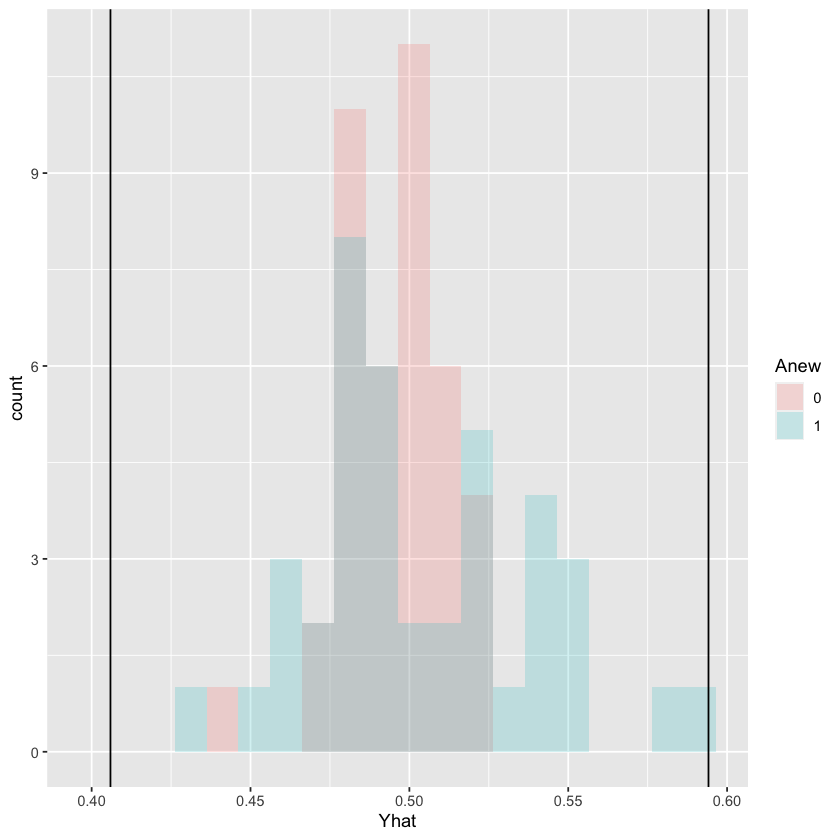

In [27]:
ggplot(df, aes(Yhat, fill = Anew)) + 
    geom_histogram(position='identity', alpha = 0.2, bins=20) +
    geom_vline(xintercept=0.4059194584406454) +
    geom_vline(xintercept=0.5941455201699561)

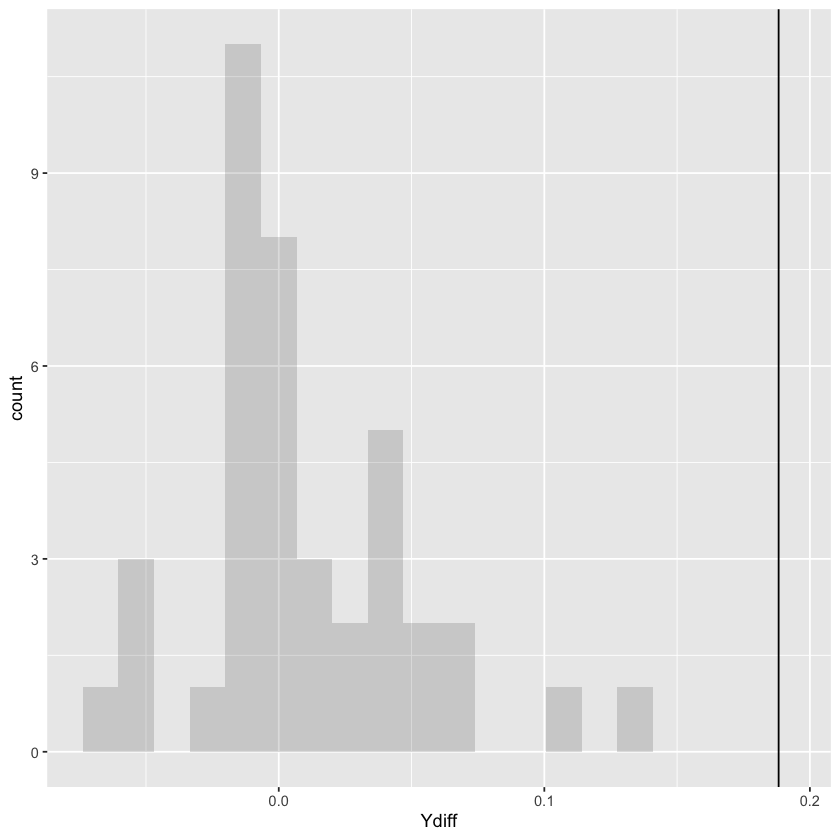

In [28]:
ggplot(result.df, aes(Ydiff)) + 
    geom_histogram(position='identity', alpha = 0.2, bins=20) +
    geom_vline(xintercept=0.18822606172931072)

In [29]:
mean((result.df$Ydiff - 0.18822606172931072)**2)

[1] 0.03405095